**Глава 2. Теория множеств.**

**Задача 2.5**
Придумайте примеры отношений, которые:

- рефлексивны и симметричны, но не транзитивны
- рефлексивны и транзитивны, но не симметричны
- транзитивны и симметричны, но не рефлексивны

**Решение**

Если думать об отношениях в терминах теории графов, то рефлексивность соответствует наличиям петель у каждой вершины, симметричность соответствует тому, что все стрелки графа направлены в обе стороны, а транзитивность тому, что если из одной вершины можно прийти в другую хоть как-нибудь, то это автоматически означает, что в неё можно пройти и напрямую. 

*Случай 1. Рефлексивно и симметрично, но не транзитивно*

Теперь нам легко построить минимальный пример отношения, в котором не выполняется транзитивность. Для этого нам нужно как минимум три вершины (т.к. в определение транзитивности присутствует три элемента), назовём их $A$, $B$ и $C$. Предположим, что $A \sim B$ и $B \sim C$, но при этом $А \nsim С$, тогда транзитивность не выполняется. Чтобы выполнялись рефлексивность нам нужно добавить $A \sim A$, $B \sim B$, $C \sim C$ и чтобы выполнялась симметрия нам нужно добавить $B \sim A$, $C \sim B$. 

В итоге получим следующее отношение, представленное в виде графа:

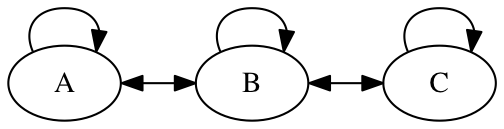

In [36]:
import networkx as nx
from nxpd import draw

nodes = 'ABC'

# Describe edges.
break_transitivity = ['AB', 'BC']  # but no 'A -> C'
reflexivity        = [(x, x) for x in nodes]
symmetricity       = [(y, x) for (x, y) in break_transitivity]
edges              = break_transitivity + reflexivity + symmetricity

# Draw graph.
g = nx.DiGraph()
g.graph['dpi'] = 150
g.graph['rankdir'] = 'LR'
g.graph['concentrate'] = True
g.add_nodes_from(nodes)
g.add_edges_from(edges)

draw(g, show='ipynb')  

# note that there is no direct A -> C edge, breaking transitivity

В качестве какого-то другого, менее искусственного примера "из жизни", мы можем взять отношение "быть другом в соцсети". Каждый сам себе друг (т.к. видит свои посты), отношение дружбы симметрично (иногда это не так, но пусть в нашей соцсети будет строго так), но тем не менее оно обычно автоматически не распространяется дальше по цепочке, то есть транзитивность не выполняется.

Ещё один хороший пример (взятый из вики): отношение "примерно равно", оно тоже не транзитивно, даже если его более точно определить, т.к. ошибка накапливается. В то же время рефлексивность и симметричность очевидны.

*Случай 2. Рефлексивно и транзитивно, но не симметрично*

Здесь можно взять обычное отношение $\leq$, скажем на натуральных числах:

- $x \leq x$
- $x \leq y \land y \leq z \implies x \leq z$

Но тем не менее: $x \leq y \not \Rightarrow y \leq x$



*Случай 3. Симметрично и транизитивно, но не рефлексивно*

Здесь можно вспомнить о том, что для того, чтобы "сломать" рефлексивность достаточно чтобы она не выполнялась лишь для одного элемента. Однако просто "убрать петельку" у одного элемента в произвольном отошении эквивалентности недостаточно, т.к. при этом нужно ещё и сохранить остальные свойства. Интересно, что используя транзитивность таким образом $x \sim y \land y \sim x \implies x \sim x$, мы автоматически получаем рефлексивность, если найдётся хоть один $y \ne x$, через которого мы сможем "пройти". Отсюда мы получаем, что не-рефлексивный $x$ должен быть изолирован, то есть не состоять в отношении ни с кем, иначе будет ломаться транзитивность или симметричность.

Здесь мне пришло на ум "not a number" из стандарта арифметики чисел с плавающей точкой. Если взять отношение "равно" на множестве чисел плюс NaN, то поскольку NaN != NaN, рефлексивность будет нарушена, однако все остальные свойства будут выполнены. Заметим, что NaN здесь "изолирован", то есть он не равен ни одному из элементов множества.

Есть и более простой пример: пустое множество-отношение на любом непустом множестве. В таком случае рефлексивность не будет выполняться ни для какого из элементов, а симметричность и транзитивность будут vacuously выполняться.

---

**Задача 2.6** Докажите, что множество X с отношением эквивалентности разбивается на объединение непересекающихся классов эквивалентности.

** Решение **

Чтобы это доказать нам нужно показать две вещи: 

1. Что объединение всех классов эквивалентности равно целому множеству, то есть что нет ни одного элемента, который не входит ни в один класс эквивалентности. Это действительно так, поскольку для каждого элемента x есть хотя бы один класс эквивалентности, т.к. x~x по рефлексивности отношения эквивалентности и, как следствие, по определению х входит в свой же класс эквивалентности.

2. Что классы эквивалентности не пересекаются. Докажем от противного. Предположим, что какие-то разные классы эквивалентности пересекаются, то есть существует элемент х, который входит в два класса сразу. Тогда по транзитивности этот элемент можно использовать как "переходной мостик" из одного класса в другой и таким образом получится, что все элементы этих двух множеств состоят в отношении и таким образом входят в один и тот же класс эквивалентности. Получили противоречие, что показывает, что разные классы эквивалентности не пересекаются.

Ещё отдельно нужно рассмотреть пустое множество, но с ним всё понятно, оно очевидно соответствует доказываемым условиям. 

Ч.т.д.